# Analisis Exploratorio

In [7]:
!pip install quickda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import quickda

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *


In [9]:
#Subir archivo
datos = pd.read_csv("/content/cleaned_data.csv")

Ahorita empieza la exploracion de datos 

In [10]:
#Mostrar Datos
datos.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,start_time,venue
0,"40,03",New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",3:13,"Night Game, on grass",Kansas City Royals,0,9,4,Start Time: 7:38 p.m. Local,Kauffman Stadium
1,"21,621",Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,Start Time: 7:11 p.m. Local,Great American Ball Park
2,"12,622",Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,Start Time: 7:07 p.m. Local,Oriole Park at Camden Yards
3,"18,531",Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",2:53,"Night Game, on grass",Atlanta Braves,1,8,1,Start Time: 7:10 p.m. Local,Turner Field
4,"18,572",Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,Start Time: 12:40 p.m. Local,Chase Field


In [11]:
#Descripcion columnas numericas 
datos.describe()

,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs
count,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,0.580593,8.764515,4.413723,0.585871,8.611855,4.519691
std,0.793391,3.511581,3.104556,0.805542,3.436965,3.111572
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000,0.000000,6.000000,2.000000
50%,0.000000,8.000000,4.000000,0.000000,8.000000,4.000000
75%,1.000000,11.000000,6.000000,1.000000,11.000000,6.000000
max,5.000000,22.000000,21.000000,5.000000,22.000000,17.000000


In [12]:
#Tipos de datos:
datos.dtypes

attendance          object
away_team           object
away_team_errors     int64
away_team_hits       int64
away_team_runs       int64
boxscore_url        object
date                object
game_duration       object
game_type           object
home_team           object
home_team_errors     int64
home_team_hits       int64
home_team_runs       int64
start_time          object
venue               object
dtype: object

cualitativa o categórica, cuantitativa continua, cuantitativa discreta

attendance : cuantitativa discreta

away team: categorica

away team errors: cuantitativa continua

away_team_hits: cuantitativa continua

away_team_runs: cuantitativa continua

boxscore_url: cualitativa

date: cualitativa

game_duration	: cuantitativa discreta

game_type	: cualitativa

home_team	: categorica

home_team_errors: cuantitativa continua

home_team_hits: cuantitativa continua

home_team_runs: cuantitativa continua

start_time	: cuantitativa discreta

venue: cualitativa 

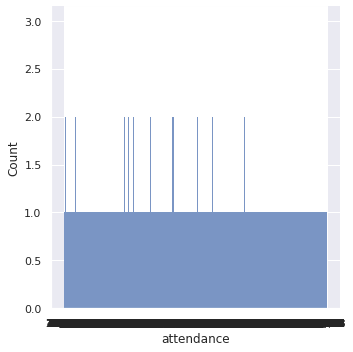

In [13]:
# gráficos exploratorios de attendance
sns.displot(datos['attendance'])


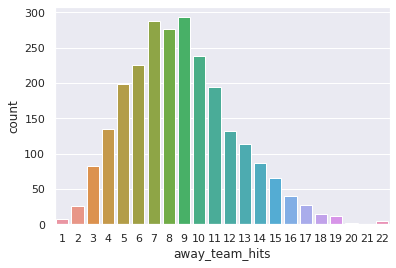

In [14]:
#Grafico exploratorio de cantidad de veces encestadas por los equipos away
sns.countplot(x = 'away_team_hits', data = datos);

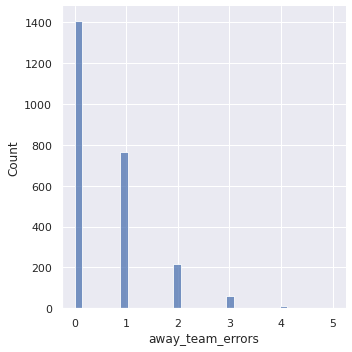

In [15]:
#grafica de cuantos errores comete el equipo away
sns.displot(datos['away_team_errors'])

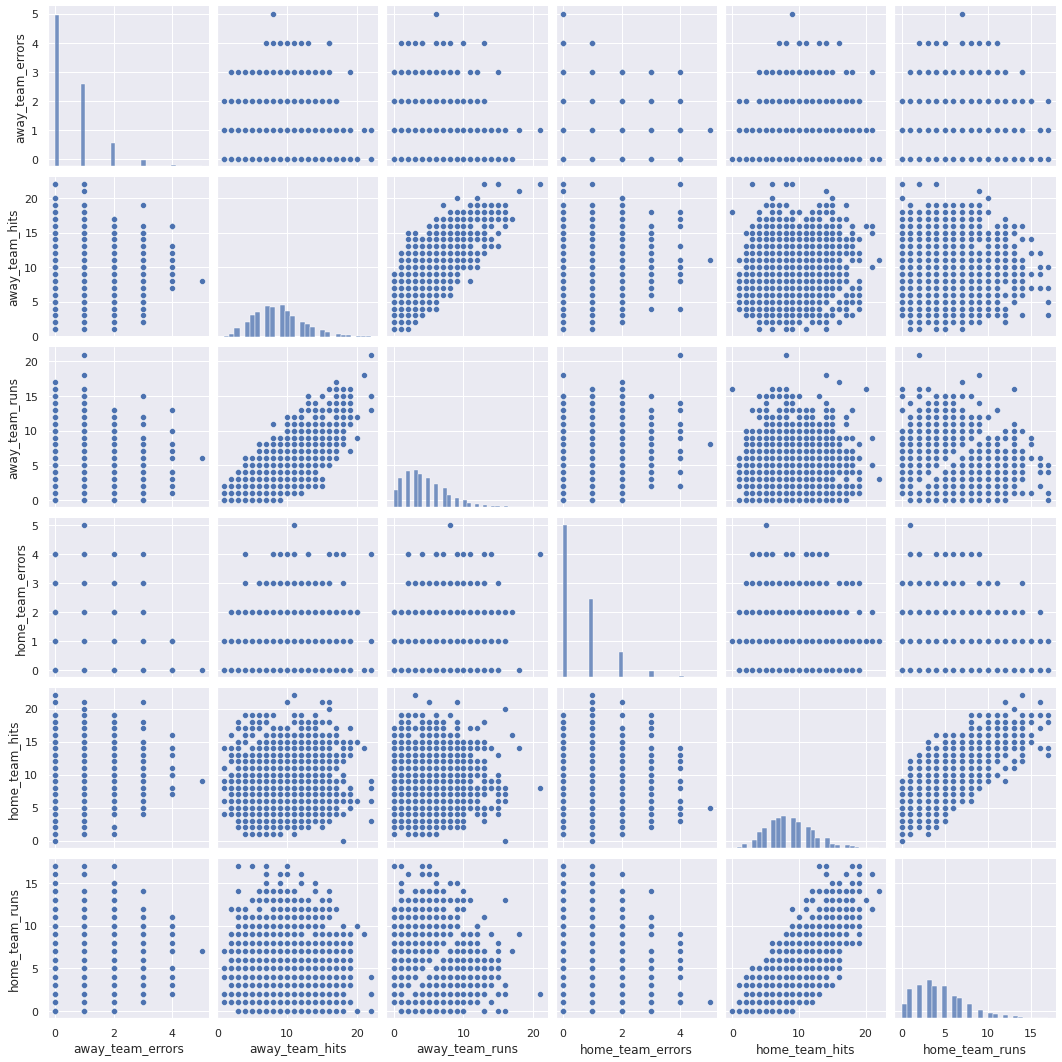

In [16]:
#Todos los datos en gráficas
sns.pairplot(datos)

1.4

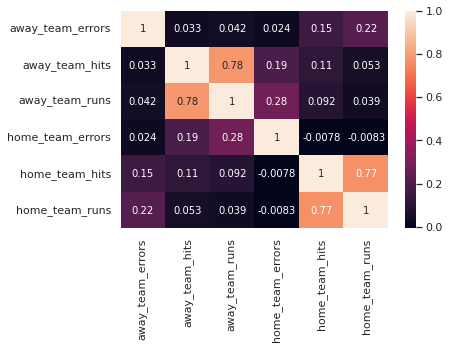

In [17]:
#analisis correlacion
#se separan los datos cuantitativos
cuantitativos = datos.select_dtypes(include=['int', 'float'])
#los datos cualitativos
cualitativos = datos.select_dtypes(exclude=['int', 'float'])

#para la correlacion seaborn tiene la funcion corr
correlacion  = cuantitativos.corr()

#El famoso heatmap
sns.heatmap(correlacion, annot=True)


1.5


In [18]:
cualitativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   attendance     2463 non-null   object
 1   away_team      2463 non-null   object
 2   boxscore_url   2463 non-null   object
 3   date           2463 non-null   object
 4   game_duration  2463 non-null   object
 5   game_type      2460 non-null   object
 6   home_team      2463 non-null   object
 7   start_time     2463 non-null   object
 8   venue          2463 non-null   object
dtypes: object(9)
memory usage: 173.3+ KB


In [19]:
#Valores de puntos por equipos contrarios y de casa
cualitativos['away_team'].value_counts()


Chicago Cubs                     90
Cleveland Indians                87
Los Angeles Dodgers              87
Toronto Blue Jays                85
San Francisco Giants             84
Boston Red Sox                   83
Washington Nationals             83
Baltimore Orioles                82
Texas Rangers                    82
Cincinnati Reds                  81
New York Yankees                 81
New York Mets                    81
Arizona Diamondbacks             81
Milwaukee Brewers                81
Kansas City Royals               81
Oakland Athletics                81
Pittsburgh Pirates               81
Los Angeles Angels of Anaheim    81
Miami Marlins                    81
Philadelphia Phillies            81
San Diego Padres                 81
Detroit Tigers                   81
Houston Astros                   81
Chicago White Sox                81
St. Louis Cardinals              81
Seattle Mariners                 81
Colorado Rockies                 81
Minnesota Twins             

In [20]:
cualitativos['home_team'].value_counts()

Cleveland Indians                89
Chicago Cubs                     89
Los Angeles Dodgers              86
Toronto Blue Jays                86
Washington Nationals             84
Texas Rangers                    83
San Francisco Giants             83
New York Mets                    82
Boston Red Sox                   82
Cincinnati Reds                  81
Chicago White Sox                81
St. Louis Cardinals              81
Colorado Rockies                 81
Houston Astros                   81
Minnesota Twins                  81
Kansas City Royals               81
Philadelphia Phillies            81
Seattle Mariners                 81
Milwaukee Brewers                81
New York Yankees                 81
Oakland Athletics                81
Pittsburgh Pirates               81
San Diego Padres                 81
Tampa Bay Rays                   81
Arizona Diamondbacks             81
Atlanta Braves                   81
Baltimore Orioles                81
Los Angeles Angels of Anahei

In [21]:
#Mejor equipo home
cualitativos['home_team'].max()

'Washington Nationals'

In [22]:
#Mejor equipo away
cualitativos['away_team'].max()

'Washington Nationals'

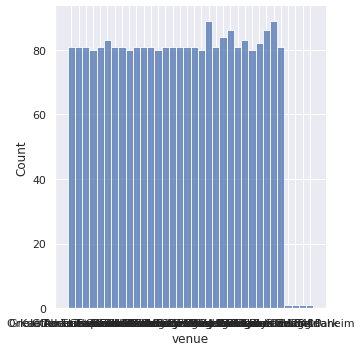

In [23]:
#venues más usadas
sns.displot(cualitativos['venue'])

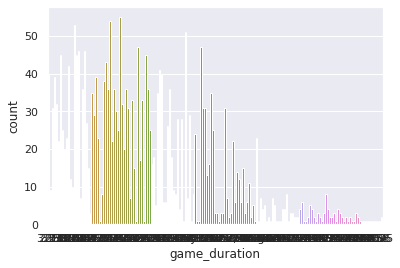

In [24]:
#duracion de los juegos 
sns.countplot(x = 'game_duration', data = cualitativos);

1.6

In [25]:
#Como la columna field type esta vacia se elimina en los cuantitativos
cuantitativos = clean(cuantitativos, method = 'dropcols', columns = ['field_type'])

In [26]:
#se borran los datos vacios
cuantitativos = cuantitativos.dropna()

In [27]:
#En los cualitativos se van a borrar la columna other string info
cualitativos = clean(cualitativos, method = 'dropcols', columns = ['other_info_string'])

In [28]:
#en los cualitativos tambien se borran datos vacios
cualitativos = cualitativos.dropna()

In [29]:
#base de los cuantitativos
explore(cuantitativos, method="summarize")

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
away_team_errors,int64,2463,0,0.0,6,0,0.0,0.0,1.0,5,0.581,0.0,0.793,1.456
away_team_hits,int64,2463,0,0.0,22,1,6.0,8.0,11.0,22,8.765,8.0,3.512,0.514
away_team_runs,int64,2463,0,0.0,20,0,2.0,4.0,6.0,21,4.414,4.0,3.105,0.939
home_team_errors,int64,2463,0,0.0,6,0,0.0,0.0,1.0,5,0.586,0.0,0.806,1.442
home_team_hits,int64,2463,0,0.0,23,0,6.0,8.0,11.0,22,8.612,8.0,3.437,0.476
home_team_runs,int64,2463,0,0.0,18,0,2.0,4.0,6.0,17,4.520,4.0,3.112,0.920


In [30]:
#base cualitativos
explore(cualitativos, method="summarize")

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
attendance,object,2460,0,0.0,2374,"10,068",-,-,-,"9,89",-,-,-,-
away_team,object,2460,0,0.0,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-
boxscore_url,object,2460,0,0.0,2460,https://www.baseball-reference.com/boxes/ANA/A...,-,-,-,https://www.baseball-reference.com/boxes/WAS/W...,-,-,-,-
date,object,2460,0,0.0,203,"Friday, April 15, 2016",-,-,-,"Wednesday, September 7, 2016",-,-,-,-
game_duration,object,2460,0,0.0,168,1:15,-,-,-,6:13,-,-,-,-
game_type,object,2460,0,0.0,4,"Day Game, on grass",-,-,-,"Night Game, on turf",-,-,-,-
home_team,object,2460,0,0.0,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-
start_time,object,2460,0,0.0,207,Start Time: 11:05 a.m. Local,-,-,-,Start Time: 9:52 p.m. Local,-,-,-,-
venue,object,2460,0,0.0,31,AT&T Park,-,-,-,Yankee Stadium III,-,-,-,-


# **Regresion Lineal**

In [31]:
#librerias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [67]:
X = np.array(cuantitativos[['home_team_errors','home_team_hits']])
Y = np.array(cualitativos['game_duration'].values.tolist())

dummies = np.array([12623, 14625, 32642])

Y = np.append(Y, dummies)

xt, xs, yt, ys = train_test_split(X, y, test_size=0.999)

# Aplicar feature scaling
scaler = StandardScaler()
xt = scaler.fit_transform(xt)
xs = scaler.transform(xs)

regresion = LinearRegression().fit(xt, yt)

y_pred = regresion.predict(xs)

print(y_pred)

[5.  2.  7.5 ... 6.5 1.5 5.5]


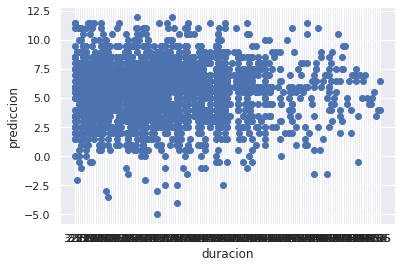

In [68]:
prediccion = np.delete(prediccion, -1)


duration = cualitativos['game_duration'].to_numpy()

prediccion.shape

plt.scatter(duration, prediccion)
plt.xlabel('duracion')
plt.ylabel('prediccion')
plt.show()

parametro r2

In [69]:
from sklearn.metrics import r2_score

ys = np.delete(ys, -1)

mse = mean_squared_error(ys, prediccion)

r2 = r2_score(ys, prediccion)
print("R^2: ", r2)
print("Mean Squared Error: ", mse)

R^2:  -0.2202444741221743
Mean Squared Error:  14.387500000000006


constantes modelo

In [70]:
print(regresion.coef_)
print(regresion.intercept_)

[-1.  1.]
3.0


# Hallazgos y conclusiones.

Con la regresion lineal se pudo ver que se realizan mas anotaciones en los primeros minutos de juego y que mientras mas pase el tiempo menos anotaciones se van realizando.

Seguidamente el equipo mas fuerte de esta temporada fueron los Washington Nationals; el cual tenia mas anotaciones tanto como eran home, como cuando eran away

Tambien se puede denotar una alta correlacion entre los puntos anotados por los equipos away y las "away runs", lo cual puede explicar la alta posibilidad de encestar entre los primeros minutos, mas que los ultimos
